<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Review Session</h1>
</div>

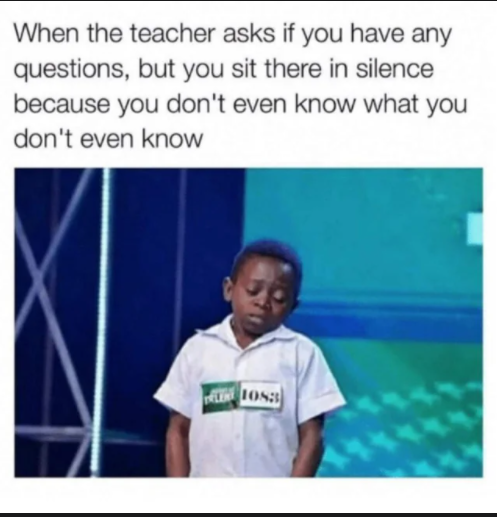

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1> Type System Review</h1>
</div>

Type System Overview
==

* In a programming language a type system is the set of *types*(Data Types) available and the rules of how they can be used & interacted with each other. 

* Type system implementations vary and effect speed and features when programming

* Set of constraints, more constraints can lead to less bugs

* Dynamic Typing: Type checking is performed at runtime. The type of a variable is allowed to change over its lifetime.

* Static Typing: Type checking occurs when the code is compiled(Before it is ran). The type of the variable needs to be declared when creating/assigning the variable. Variable's data type can't be changed generally.

Type Annotations & Hints
==

It let's you add information about types to the function, you simply annotate its arguments and return value. Effectly the first step of making Python more statically typed.

```def headline(text: str, align: bool = True) -> str:```

In terms of style, PEP 8(https://realpython.com/python-pep8/) recommends the following:

* Use normal rules for colons, that is, no space before and one space after a colon: text: str.
* Use spaces around the = sign when combining an argument annotation with a default value: align: bool = True.
* Use spaces around the -> arrow: def headline(...) -> str.

In [ ]:
#Without type hints

def multiply(x, y):
    return x * y

In [ ]:
#With type hints

def multiply(x: int, y: int) -> int:
    return x * y

In [ ]:
#REMEMBER Type annotations alone doesn't effect how the code is ran, they're just Type HINTS
multiply(5,"cat")

IDEs can take full advantage of type annotations to improve coding process.

In [ ]:
%load_ext mypy_ipython
# Type Checks our entire Notebook
%mypy

What are the benfits!?!
==

* Type hints help us document our code, this along side docstrings can make our functions and code much more readable and understandable amongst team members
* Uses the full power of IDEs and linters, it boosts code completion of editors, and suggestions.
* It helps you think about your code while keeping types in mind, can help us make more logical code. 

Some Downsides
==

* Time, time, time, It requires a more time to implement code, requiring us to add more lines(Though it can help us spend less time debugging)
* Can increase code start up time, from having to import more modules(Typing, will talk about this later) and running mypy to type check your code.

Some Notes:
==

* The `typing` module contains many more composite types, including Counter, Deque, FrozenSet, NamedTuple, and Set.
* With mypy installed `__annotations__` can be used on variables to view the types needed
* The type hints might become quite oblique when working with nested types like the deck of cards. You may need to stare at `List[Tuple[str, str]]` a bit before figuring out that it matches our representation of a deck of cards. We can define our own type aliases by assigning type annotations to new variables. 
* `Any` and `TypeVar` can be used for variables that may be any type, TypeVar is more flexible though


Typing Resources:
==

* https://realpython.com/python-type-checking/
* https://towardsdatascience.com/static-typing-in-python-55aa6dfe61b4
* https://www.freecodecamp.org/news/compiled-versus-interpreted-languages/

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1> Named Tuples Review</h1>
</div>

Named Tuple Overview
==

* Named tuples assign meaning to each position in a tuple and allow for more readable, self-documenting code
* They add the ability to access fields by name instead of position index
* They can be used wherever regular tuples are used
* It's a tuple subclass provided to us from the collections module of the Python standard library. namedtuple is a factory function for creating tuples with named fields.
* This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.

In [ ]:
#Import namedtuple from the collections library
from collections import namedtuple
#Use namedtuple to setup 
Pokemon = namedtuple('Pokemon', ['name','type','hp'])

# We pass in the values into the Student Type
pikachu = Pokemon("Pikachu", "Electric", 100)
print(pikachu)

#We can access the values by index(Same as regular Tuples)
print(pikachu[0])

#or we can access the field by it's name
print(pikachu.type)
#We use the dot-operator 
# because the Square brace[] is reserved for indexes


In [ ]:
# fields attribute shows us what fields belongs to the tuple
print(pikachu._fields)

In [ ]:
#We can turn iterables into Named Tuples
#They must follow the same format
# Use _make method
charmander = Pokemon._make(["Charmander", "Fire", 80])
print(charmander)

In [ ]:
# We can turned named tuples into dicts if needed
#Use _asdict method
print(charmander._asdict())

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1> Data Class Review</h1>
</div>

Data Class Overview
==

* A data class is a class that typically contains mainly data, although it isn't only restricted to that.
* The @dataclass decorator is used to create a Data Class.
* __Abstracts__ away alot of __boilerplate__ code when creating classes
*  Such as the `init` method, the `repr`(String representation), and comparing data class instances.

In [15]:
#Basic Example

from dataclasses import dataclass

#No need for an init method
@dataclass
class Player:
    #Must use Type annotations 
    rank: int
    name: str
    score: int    
        
#We see here we can pass values for rank and suit without setting up an init method
player1 = Player(1, 'Mal', 750)

print(player1.rank)

#No need to setup a repr or str method
print(player1)

#Handles Equality for us as well
print(player1 == Player(1, 'Mal', 750))

1
Player(rank=1, name='Mal', score=750)
True


In [16]:
#This would be the equivalent to using Data Class
class Player:
    def __init__(self, rank, name, score):
        self.rank = rank
        self.name = name
        self.score = score
        
    def __repr__(self):
        return (f'{self.__class__.__name__}'
                f'(rank={self.rank!r}, name={self.name!r}, score={self.score!r})')

    def __eq__(self, other):
        if other.__class__ is not self.__class__:
            return NotImplemented
        return (self.rank, self.name, self.score) == (other.rank, other.name, other.score)

In [ ]:
#Other Examples of things we can do with Data Classes
@dataclass
class Book:
    name: str
    weight: float
    #We can have default values
    shelf_id: int = 0
    #Post init acts similar to the regular class init 
    def __post_init__(self):
        self.shelf_name = f"Shelf #{self.shelf_id}" 

In [ ]:
from dataclasses import dataclass, field
from typing import List


@dataclass
class Pizza:
    # Each of these is called a field, must utilize Type annotation
    crust: str
    has_cheese: bool = True
    toppings: List[str] = field(default_factory=list)

In [ ]:
from dataclasses import asdict, astuple, replace

# An __init__ is created which takes all fields as args or kwargs!
thick_cheesy = Pizza(crust='thick')

# __repr__ is generated, exclude any fields you don’t want
print(thick_cheesy)
# Prints "Pizza(crust='thick', has_cheese=True, toppings=[])"

# Handy method to create a dict, only includes fields
d = asdict(thick_cheesy)
assert d == {
    'crust': 'thick',
    'has_cheese': True,
    'toppings': [],
}

# Create a new object based on another object
with_olives = replace(thick_cheesy, toppings=['olives'])

# Make a tuple from the fields
t = astuple(with_olives)
assert t == ('thick', True, ['olives'])

# __eq__ is generated
assert with_olives != thick_cheesy # Effectively compares as tuples 


<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1> Unit Test Review</h1>
</div>

Testing Overview
==

* Software testing is conducted to provide developers with information about the quality of the code or applicaton
* Test techniques include the process of executing a program or application with the intent of finding failures, and verifying that the software product is fit for use.
* Testing Minimizes Bugs
* Writing Testable Code Improves Overall Quality
* Tests Enhance Documentation
* Tests Make It Easier to Add New Features

Test Driven Development
==

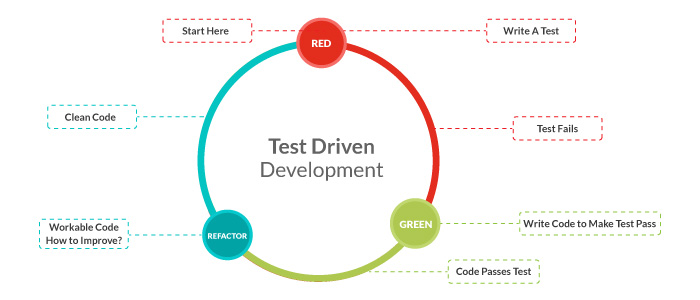

Unit Test
==

* Unit testing is a software development process in which the smallest testable parts of an application, called units, are individually and independently scrutinized for proper operation
* A unit test helps you to isolate what is broken in your application and fix it faster.

Testing and You
==

* Testing comes up alot as bonus requirements on applications
* Important for continuous integration
* Helpful in larger projects
* Manual testing of code is important after automated testing is complete. There is no substitute for peer review and feedback.

File Naming Conventions
==
_test after file name keeps file and test next to each

     project-folder/
        calculator.py
        calculator_test.py
        potato.py
        potato_test.py
test_ before file name keeps all file & tests together

    project-folder/
        calculator.py
        potato.py
        test_calculator.py
        test_potato.py
        
https://docs.python.org/3/library/unittest.html

In [ ]:
import unittest

def fun(x):
    """This function should add 1 to the input"""
    return x + 1

class MyTest(unittest.TestCase):
    def test(self):
        self.assertEqual(fun(3), 4)
        
#Verbosity keyword specifies how detailed the test report is
unittest.main(argv=[''], verbosity=2, exit=False)

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Exponential functions and logarithms</h1>
</div>

In [26]:
import math
import numpy as np

## Exponential functions

What is **e**? It is simply a number (known as Euler's number):

In [27]:
math.e

2.718281828459045

**e** is a significant number, because it is the base rate of growth shared by all continually growing processes.


For example, if I have **10 dollars**, and it grows 100% in 1 year (compounding continuously), I end up with $10e^{1}$ dollars:

In [28]:
# 100% growth for 1 year
10 * np.exp(1)

27.18281828459045

In [20]:
# 100% growth for 2 years
10 * np.exp(2)

73.89056098930651

Side note: When e is raised to a power, it is known as **the exponential function**. Technically, any number can be the base, and it would still be known as **an exponential function** (such as 2^5). But in our context, the base of the exponential function is assumed to be e.

Anyway, what if I only have 20% growth instead of 100% growth?

In [30]:
# 20% growth for 1 year
10 * np.exp(0.20)

12.214027581601698

In [31]:
# 20% growth for 2 years
10 * np.exp(0.20 * 2)

14.918246976412703

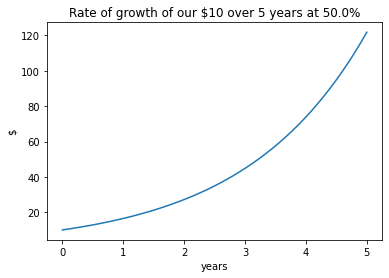

In [41]:
balance = 10
years = 5
rate = 0.5

x = np.linspace(0,years,50)
y = balance * np.exp(rate*x)

plt.plot(x,y)
plt.title(f"Rate of growth of our ${balance} over {years} year{'s' if years > 1 else ''} at {rate*100}%")
plt.xlabel('years')
plt.ylabel('$')
plt.show()

## Logarithms

What is the **(natural) logarithm**? 

First an example:

2 to the 3rd power would give you 8:

$$ 2^{3} = 8$$

log of 8 to base 2 would give you 3: 

$$ log_{2}8 = 3 $$

Essentially, the log of a number will give you the power that you must raise the base to in order to get that number.

Generalizing this would yield:

$$ b^x = y $$

$$ log_{b}y = x $$

For our continuously compounding interest, it gives you the time needed to reach a certain level of growth. For example, if I wanted \\$1 to grow to $2.718, I could calculate how much time that would take (at 100% interest) using the following:

In [38]:
# time needed to grow $1 to $2.718 at 100% interest
np.log(2.718)

0.999896315728952

If I wanted \\$1 to grow to $7.389, it will take me 2 years.

In [50]:
# time needed to grow $1 to $7.389
np.log(7.389)

1.9999924078065106

If I wanted \\$1 to grow to \\$1, it will take me 0 years

In [39]:
# time needed to grow 1 unit to 1 unit
np.log(1)

0.0

If I wanted \\$1 to grow to \\$0.5, it will take me -0.693 years (which is like looking back in time):

In [ ]:
# time needed to grow 1 unit to 0.5 units
np.log(0.5)

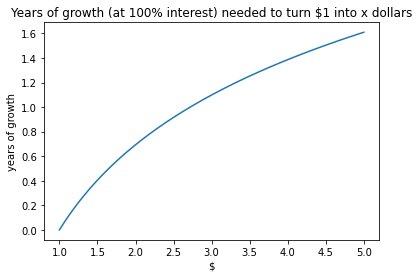

In [53]:
years = 5

x = np.linspace(1,years,5000)
y = np.log(x)

plt.plot(x,y)
plt.title(f"Years of growth (at 100% interest) needed to turn $1 into x dollars")
plt.xlabel('$')
plt.ylabel('years of growth')
plt.show()

**Notice that when we used np.log we didn't specify any base? Because when we don't specify a base number, it assumes we mean $e$.**

log of a number $x$ to the base $e$ is a special version of logarithm that appears everywhere, including in continuously compounding interest, so it's called natural logarithm usually denoted by $ln$

$$ ln(x) = log_{e}(x) $$ 

## Connecting the concepts

As you can see, the exponential function and the natural logarithm are **inverses** of one another

$$ e^{1} = 2.718... $$
$$ ln(2.718...) = 1 $$

AttributeError: 'tuple' object has no attribute 'lower'

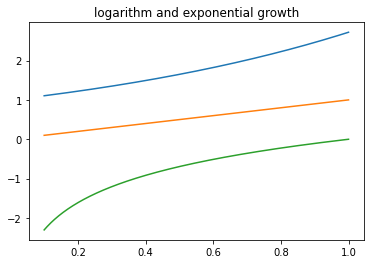

In [81]:

x = np.linspace(0.1,1,500)
log = np.log(x)
exp = np.exp(x)
plt.plot(x,exp, label="e")
plt.plot(x,x)
plt.plot(x,log, label="logarithm")
plt.title(f"logarithm and exponential growth")
plt.yscale((0,2))
plt.legend()
plt.show()

In [3]:
np.log(np.exp(5))

5.0

In [4]:
np.exp(np.log(5))

4.999999999999999

# Conditional Probabilities

$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

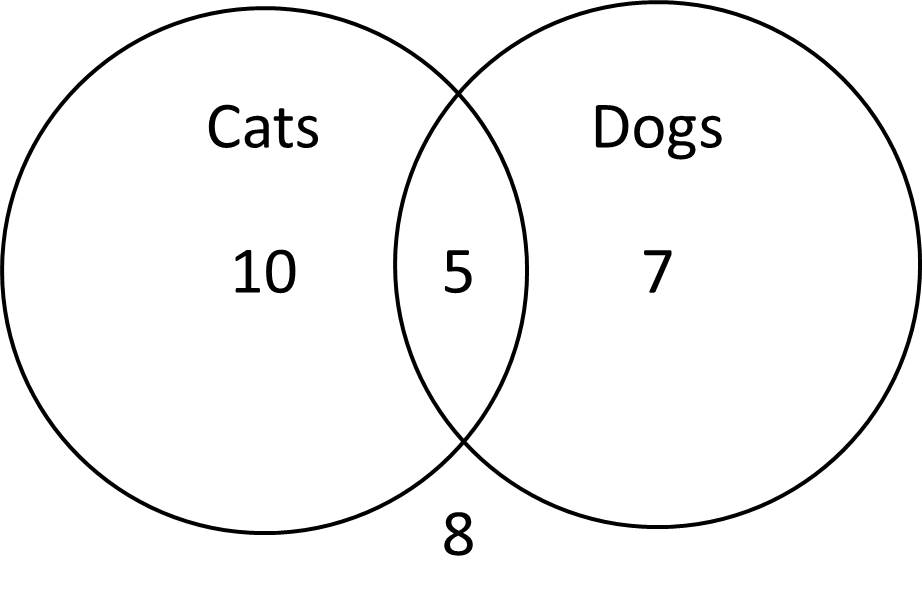

$$ \textbf{Total number of students} = 8 + 5 + 10 + 7 = 30 $$

$$ P(A) = \frac{10+5}{30} = 0.5$$

$$ P(B) = \frac{7+5}{30} = 0.4$$

$$ P(A \cup B) = P(A) + P(B) - P(A \cap B) = \frac{15}{30} + \frac{12}{30} - \frac{5}{30}$$ 
$$ P(A \cup B) = \frac{22}{30} = 0.73333... $$

$$ P((A \cup B)^{c}) = \frac{8}{30} = 0.26666... $$

Note: $ P((A \cup B)^{c}) = 1 - P(A \cup B) $


$$ P(A \cap B) = \frac{5}{30} = 0.16666... $$ 

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$
$$ P(A|B) = \frac{0.1666...}{0.4} =  0.41666...$$

Notice something? 

$$ P(A|B) = \frac{5}{12} = 0.41666...$$

# Logistic Regression

Also known as log odds and logit, logistic regression is very similar to the linear regressions we've done. However the goal of logistic regression is to model the probability that data is part of a default class. In this sense it's able to perform binary classification.

**Wait, regression for classification???**

Is it possible to use regression to get a value between 0 and 1 and simply round to get a binary value?

**NO.** The reason for this is, that the values we get do not necessarily lie between 0 and 1, so how should we deal with a -42 as our response value?

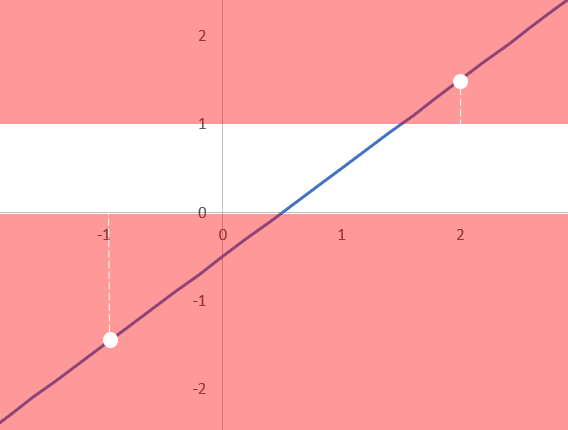

As you can see in the above illustration, an arbitrary selected value x={-1, 2} will be placed on the line somewhere in the red zone and therefore, not allow us to derive a response value that is either (at least) between or at best exactly 0 or 1. We need a function that looks like the following:

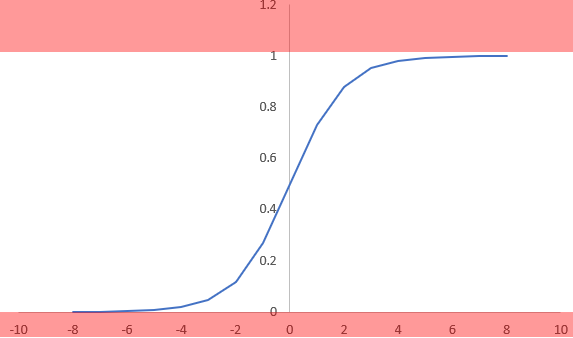

The huge advantage is that even an infinitely small number is mapped to “close to” zero and will not be somewhere beyond our boundary. 

So how do we get there from linear regression?

### How Logistic Regression works

For example, if we are modeling people’s sex as male or female from their height, then the first class could be female and the logistic regression model could be written as the probability of a person being female given a person’s height, or more formally:

$$ P(sex=female|height)$$

Written another way, we are modeling the probability that an input ($X$) belongs to the default class ($Y=1$), we can write this formally as:

$$ P(X) = P(Y=1|X)$$

We’re predicting probabilities? I thought logistic regression was a classification algorithm?

Logistic regression is a linear method, but the predictions are transformed using the logistic function. The impact of this is that we can no longer understand the predictions as a linear combination of the inputs as we can with linear regression, for example, continuing on from above, the model can be stated as:

$$ p(X) = \frac{e^{\beta_0 + \beta_1*X}}{(1 + e^{\beta_0 + \beta_1*X})} $$

I don’t want to dive into the math too much (to get from $P(X) = P(Y=1|X)$ to the above equation uses some clever math involving things like Bernoulli random variables), but we can turn around the above equation as follows (we can remove the e from one side by adding a natural logarithm (ln) to the other):

$$ ln(\frac{p(X)}{1 – p(X)}) = b0 + b1 X $$

This is useful because we can see that the calculation of the output on the right is linear again (just like linear regression), and the input on the left is a log of the probability of the default class.

This ratio on the left is called the odds of the default class (it’s historical that we use odds, for example, odds are used in horse racing rather than probabilities). Odds are calculated as a ratio of the probability of the event divided by the probability of not the event, e.g. 0.8/(1-0.8) which has the odds of 4. So we could instead write:

$$ ln(odds) = b0 + b1 * X $$

Because the odds are log transformed, we call this left hand side the log-odds or the probit. 

The logit function, also known as the log odds function, is as follows:

$$ logit(p) = log(\frac{p}{1-p}) $$

If $p$ is a probability, then $\frac{p}{1-p}$ is the corresponding odds. So the logit of the probability is the logarithm of the odds.

The logistic function of any number $ \alpha $ is given by the inverse-logit:
$$ logit^{-1}(\alpha) = logistic(\alpha) =  \frac{1}{1 + e^{-\alpha}}$$

The above function is otherwise known in machine learning as the sigmoid function:

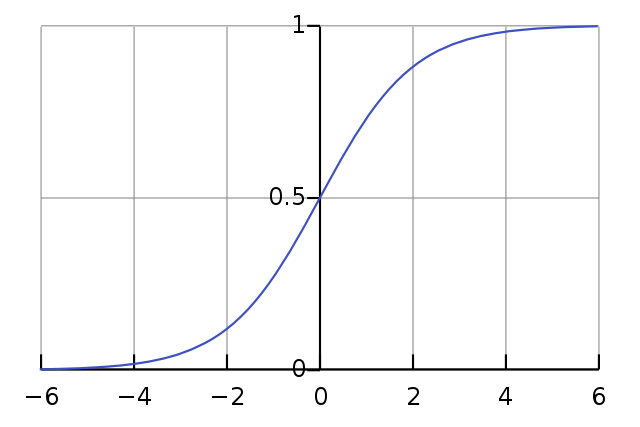

So logistic regression allows us to use a process similar to linear regression but with a slight change that maps our results to a binary outcome (by using the sigmoid function above).

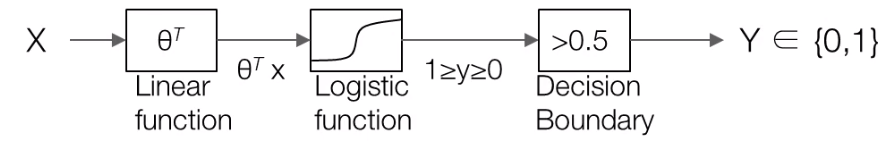

Assumptions we have to make to do a logistic regression:
* The response variable is binary
* The observations are independent
* There is no multicollinearity among the explanatory variables
* There are no extreme outliers
* There is a linear relationship between the explanatory variables and the logit of the response variable
* The sample size is sufficiently large

### Resources:
https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf
https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
https://realpython.com/logistic-regression-python/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

x = np.linspace(-6,6,100)
y = sigmoid(x)
z = 1
plt.plot(x,y)
plt.axvline(x=0,ymin=0, ymax=1, c='black', lw=0.5)
plt.axhline(y=0.5,xmin=-5, xmax=5, c='r', lw=0.5, ls='--')
plt.grid(10)
plt.suptitle("Sigmoid Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-5,5)
plt.text(1,0.2,r'$\sigma(x)=\frac{1}{1+e^{-x}}$',fontsize=20)
plt.show()

In [ ]:
df = pd.read_csv("../datasets/heightsandweights.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.rename(columns={'Gender':'Sex'}, inplace=True)

In [ ]:
df.drop("Index", axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
df.boxplot()

In [ ]:
def convert_cm_to_inches(cm):
    return cm * 0.3937008

def convert_kg_to_lbs(kg):
    return kg * 2.204623

def convert_sex_to_binary(sex):
    return 1 if sex=='Female' else 0

In [ ]:
df['Height (inches)'] = df['Height'].apply(convert_cm_to_inches)
df['Weight (lbs)'] = df['Weight'].apply(convert_kg_to_lbs)
df['Sex'] = df['Sex'].apply(convert_sex_to_binary)

In [ ]:
df.head()

In [ ]:
df[['Height', 'Weight']].boxplot()

In [ ]:
plt.scatter(x='Height', y='Weight', data=df, s=2.5, alpha=0.75)
plt.suptitle("Scatter Plot of Height and Weight")
plt.xlabel("Height")
plt.ylabel("Weight")

In [ ]:
plt.scatter(x='Height', y='Sex', data=df, s=2.5, alpha=0.75)
plt.suptitle("Scatter Plot of Height and Sex")
plt.xlabel("Height")
plt.ylabel("Sex")

In [ ]:
plt.scatter(x='Weight', y='Sex', data=df, s=2.5, alpha=0.75)
plt.suptitle("Scatter Plot of Weight and Sex")
plt.xlabel("Height")
plt.ylabel("Sex")

In [ ]:
X = df[['Height','Weight']]
       
Y = df['Sex']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, Y_train)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
y_pred

In [ ]:
plt.scatter(X_test['Height'], y_pred, s=2.5, alpha=0.75)
plt.suptitle("Scatter Plot of X_test Height and y_pred")
plt.xlabel("X_test Height")
plt.ylabel("y_pred")
plt.show()

In [ ]:
plt.scatter(X_test['Weight'], y_pred, s=2.5, alpha=0.75)
plt.suptitle("Scatter Plot of X_test Weight and y_pred")
plt.xlabel("X_test Weight")
plt.ylabel("y_pred")
plt.show()

# Confusion Matrices

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.


<table>
<tbody><tr>
<th style="background:linear-gradient(to top right,#eaecf0 49.5%,#aaa 49.5%,#aaa 50.5%,#eaecf0 50.5%);line-height:1;"><div style="margin-left:2em;text-align:right;">&nbsp; Predicted</div><div style="margin-right:2em;text-align:left;">Actual class</div>
</th>
<th><abbr title="Positive">P</abbr>
</th>
<th><abbr title="Negative">N</abbr>
</th></tr>
<tr>
<th><abbr title="Positive">P</abbr>
</th>
<td><b><abbr title="True positive">TP</abbr></b>
</td>
<td><abbr title="False positive">FP</abbr>
</td></tr>
<tr>
<th><abbr title="Negative">N</abbr>
</th>
<td><abbr title="False negative">FN</abbr>
</td>
<td><b><abbr title="True negative">TN</abbr></b>
</td></tr></tbody>
</table>

In [ ]:
help(confusion_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_test, y_pred)
cnf_matrix

In [ ]:
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score, \
                            precision_score, recall_score

print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")
print(f"Precision: {precision_score(Y_test, y_pred)}")
print(f"Recall: {recall_score(Y_test, y_pred)}")


Accuracy - What fraction of predictions did our model get right? 
Precision - What proportion of positive identifications were actually correct?
Recall - What proportion of actual positives were identified correctly?

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>SQL</h1>
</div>

In [ ]:
# our sql script

import sqlite3
from contextlib import closing

db = 'new.db'

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)

def execute(db, cmd, commit=False):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                cur = cursor.execute(cmd).fetchall()
                if commit:
                    conn.commit()
                else:
                    return cur
            except Exception as e:
                print(e)
    
                
def get_tables(db):
    rows = execute(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

### `CREATE`

```sql
-- Create a table called tablename1, with the two columns shown, for
-- the database currently in use. Lots of other options are available
-- for how you specify the columns, such as their datatypes.
CREATE TABLE tablename1 (fname VARCHAR(20), lname VARCHAR(20));
```

In [ ]:
db = 'new.db'

execute(db, 'CREATE TABLE tablename1 (fname VARCHAR(20) NOT NULL, lname VARCHAR(20) NOT NULL);',\
        commit=True)

In [ ]:
get_tables(db)

### `INSERT`

```sql
-- Insert a row of data into the table tablename1. This assumes that the
-- table has been defined to accept these values as appropriate for it.
INSERT INTO tablename1 VALUES('Unknown','Person');
```

In [ ]:
execute(db, "INSERT INTO tablename1 VALUES('Unknown','Person');", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

### `UPDATE`

```sql
-- In tablename1, change the fname value to 'John' and lname value
-- to 'Doe' for all rows that have an lname value of 'Person'.
UPDATE tablename1 SET fname='John' lname='Doe' WHERE lname='Person';
```

In [ ]:
execute(db, "UPDATE tablename1 SET fname='John', lname='Doe' WHERE lname='Person';", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

### `DELETE`
```sql
-- Delete rows from the tablename1 table
-- where the lname value begins with 'M'.
DELETE FROM tablename1 WHERE lname like 'D%';
```

In [ ]:
execute(db, "DELETE FROM tablename1 WHERE lname like 'D%';", \
        commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

```sql
-- Delete all rows from the tablename1 table, leaving the empty table.
DELETE FROM tablename1;
```

In [ ]:
execute(db, "DELETE FROM tablename1;", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

```sql
-- Remove the entire tablename1 table.
DROP TABLE tablename1;

```

In [ ]:
execute(db, "DROP TABLE tablename1;", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

### Restarting With Primary key

We need to change our `CREATE` command:

```sql
-- Create a table called tablename1, with the two columns shown, for
-- the database currently in use. Lots of other options are available
-- for how you specify the columns, such as their datatypes.
CREATE TABLE tablename1 (
    id INTEGER PRIMARY KEY,
    fname VARCHAR(20), 
    lname VARCHAR(20)
);

```

In [ ]:
# our sql script

import sqlite3
from contextlib import closing

db = 'new.db'

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)

def execute(db, cmd, commit=False):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                cur = cursor.execute(cmd).fetchall()
                if commit:
                    conn.commit()
                else:
                    return cur
            except Exception as e:
                print(e)
    
                
def get_tables(db):
    rows = execute(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

def get_cols(db, table):
    return execute(db, f"pragma table_info({table});")
    

get_tables(db)

### `CREATE`

```sql
-- Create a table called tablename1, with the two columns shown, for
-- the database currently in use. Lots of other options are available
-- for how you specify the columns, such as their datatypes.
CREATE TABLE tablename1 (fname VARCHAR(20), lname VARCHAR(20));
```

In [ ]:
db = 'new.db'

execute(db, 'CREATE TABLE tablename1\
            (id INTEGER PRIMARY KEY, \
             fname VARCHAR(20) NOT NULL, \
             lname VARCHAR(20) NOT NULL);',\
        commit=True)

In [ ]:
get_tables(db)

### `INSERT`

```sql
-- Insert a row of data into the table tablename1. This assumes that the
-- table has been defined to accept these values as appropriate for it.
INSERT INTO tablename1 VALUES('Unknown','Person');
```

In [ ]:
execute(db, "INSERT INTO tablename1 \
             VALUES(Null,'Unknown','Person');", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

### `UPDATE`

```sql
-- In tablename1, change the fname value to 'John' and lname value
-- to 'Doe' for all rows that have an lname value of 'Person'.
UPDATE tablename1 SET fname='John' lname='Doe' WHERE lname='Person';
```

In [ ]:
execute(db, "UPDATE tablename1 SET fname='John', lname='Doe' WHERE id = 1;", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

### `DELETE`
```sql
-- Delete rows from the tablename1 table
-- where the lname value begins with 'M'.
DELETE FROM tablename1 WHERE lname like 'D%';
```

In [ ]:
execute(db, "DELETE FROM tablename1 WHERE id = 3;", \
        commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

```sql
-- Delete all rows from the tablename1 table, leaving the empty table.
DELETE FROM tablename1;
```

In [ ]:
execute(db, "DELETE FROM tablename1;", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

```sql
-- Remove the entire tablename1 table.
DROP TABLE tablename1;

```

In [ ]:
execute(db, "DROP TABLE tablename1;", commit=True)

In [ ]:
execute(db, "SELECT * FROM tablename1;")

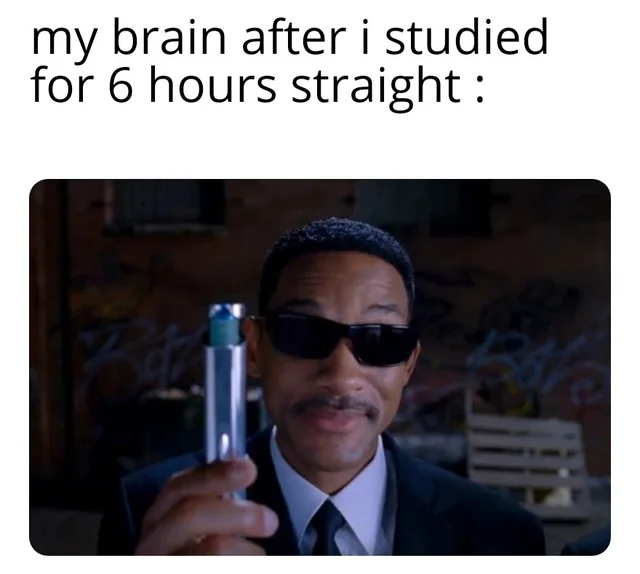